In [ ]:
#  1)	Data Cleaning and Preparation:

In [2]:
# Loading the dataset

import pandas as pd
df=pd.read_csv("cardiotocographic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [3]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
# MISSING VALUES
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
# DATA CLEANING(dropping missing values)
df.fillna(df.select_dtypes(include='number').mean(),inplace=True)

#Missing values
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#  Find range to fit all values(exlude outliers)

low_mild=Q1 - 1.5 * IQR   
high_mild=Q3 + 1.5 * IQR  

outliers = ((df < low_mild) | (df > high_mild)).sum()
print("====================================OUTLIERS COUNT==============================",'\n',outliers)


====================================OUTLIERS COUNT============================== 
 LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         580
dtype: int64


In [7]:
# extreme_low=Q1 - 3 * IQR   gives the max lowest outlier value
# extreme_high=Q3 + 3 * IQR   gives the max highest outlier value

''' Excluding extreme outlier values(~) and copying remaining values to 'df_clean'
' any(axis=1) ' is used to find if any single value in a row under a specific column is beyond the range(if True)
 then that entire row is removed''' 
#  df_clean=df[~((df<extreme_low)|(df>extreme_high)).any(axis=1)].copy()  

'''if we remove entire row then the data is lost
if we remove all extreme values then there would be some missing values in the dataset
if we do capping original values get changed...we dont know the severity of case or outlier
    CAPPING because the dataset is not huge and not tiny  '''


#print('<==================================================CAPPING SUITABLE FOR THIS DATASET==========================================================>')
df_clean=df.copy()
for col in df_clean.columns:
    if col!='NSP':
        df_clean[col]=df_clean[col].clip(low_mild[col],high_mild[col])


In [ ]:
# 2)  Statistical Summary:

In [8]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
# 3)  DATA VISUALIZATION

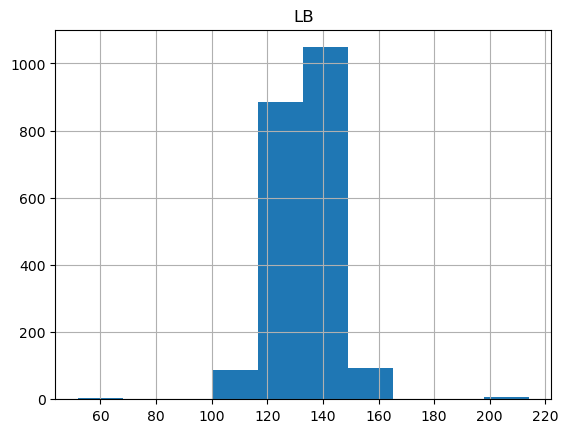

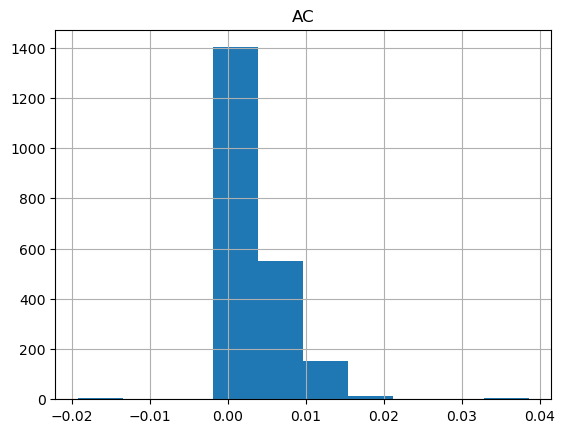

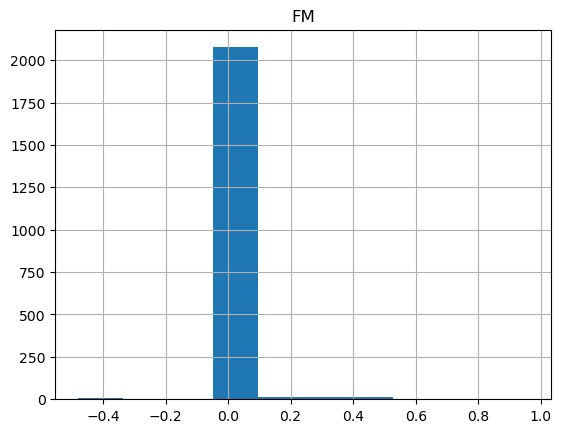

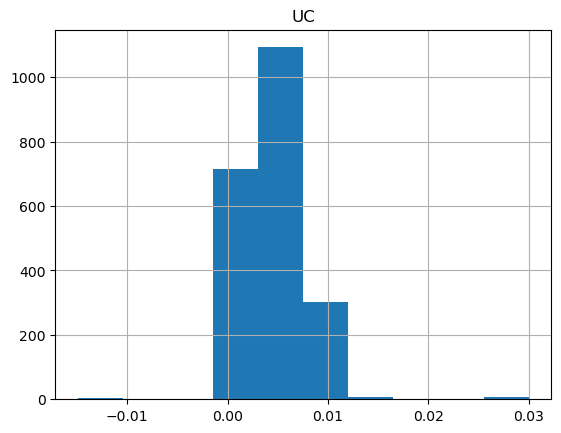

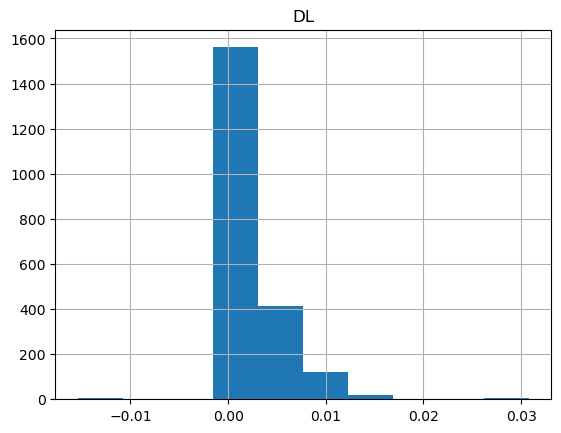

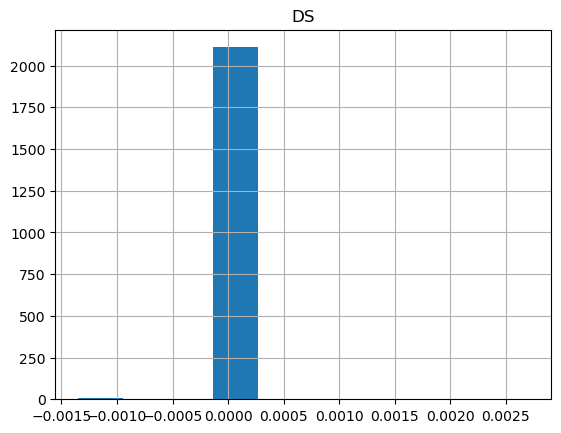

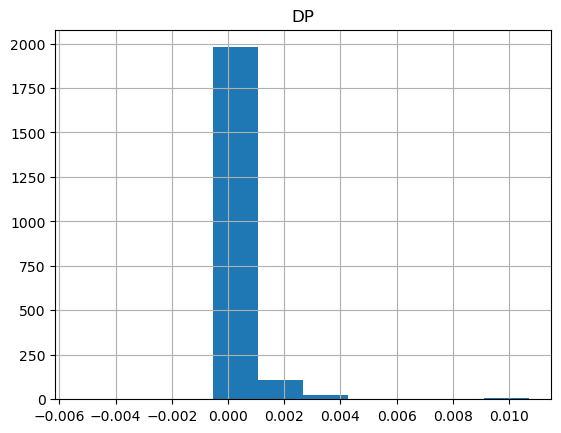

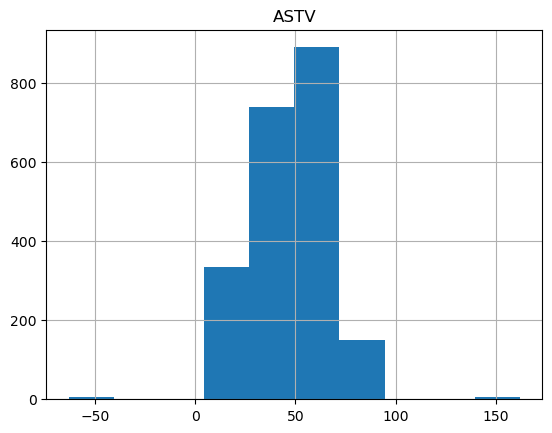

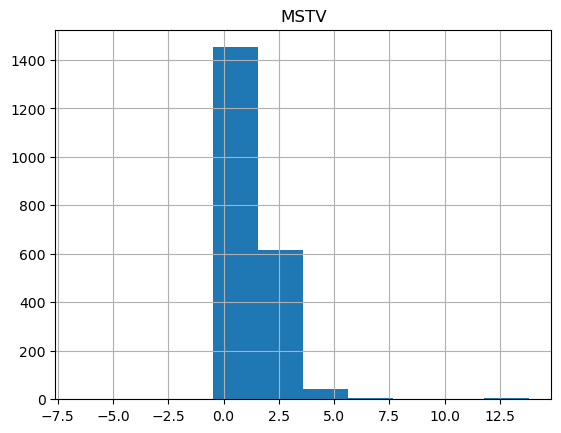

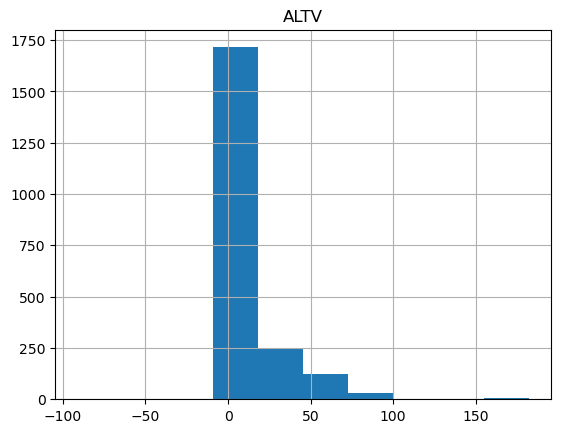

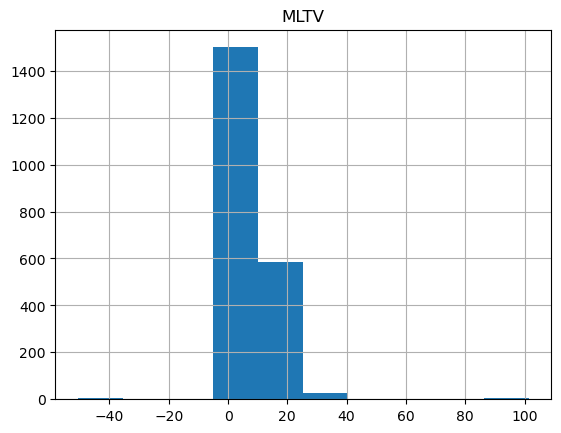

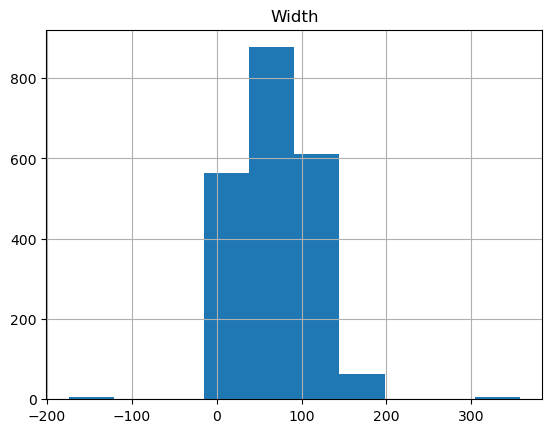

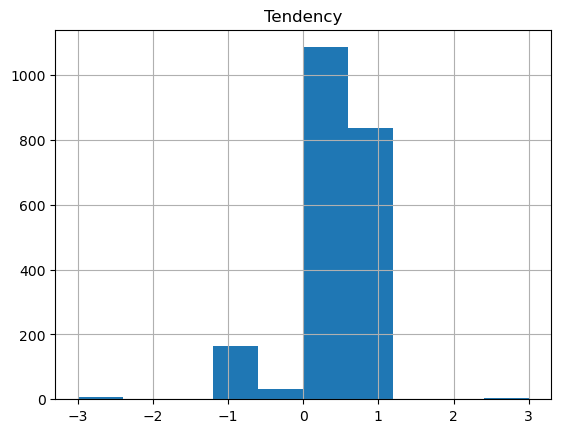

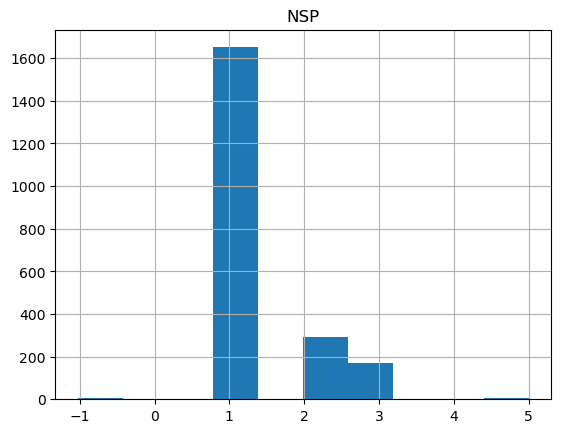

In [9]:

#  Histograms 
import matplotlib.pyplot as plt
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.grid()
    plt.show()

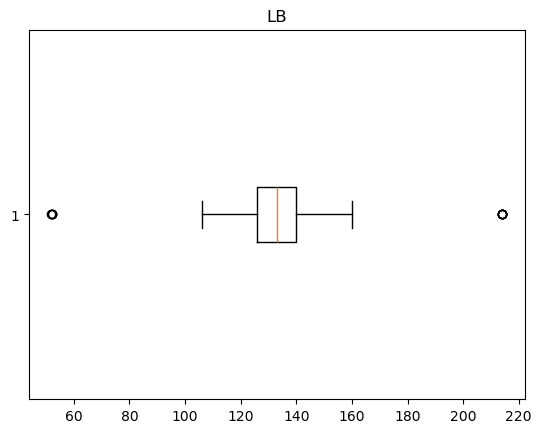

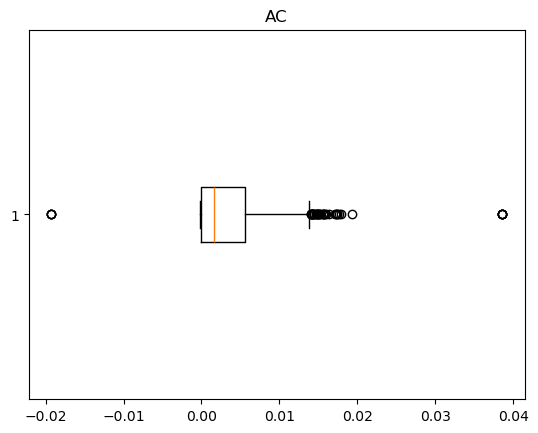

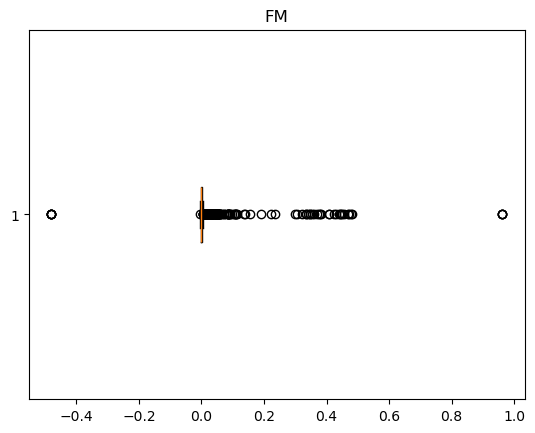

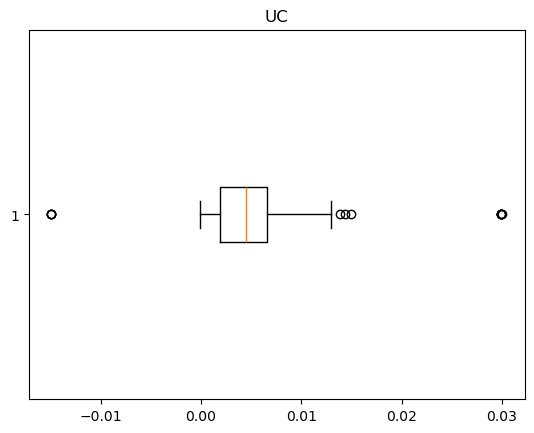

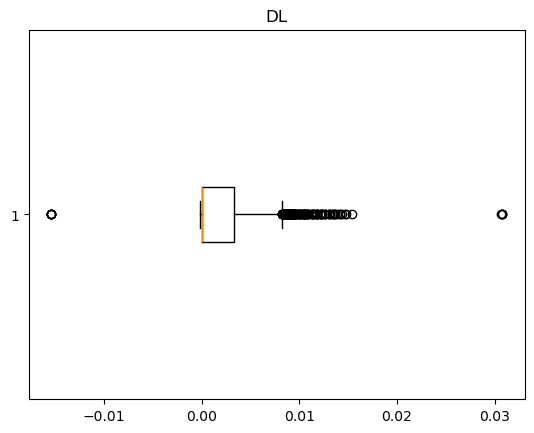

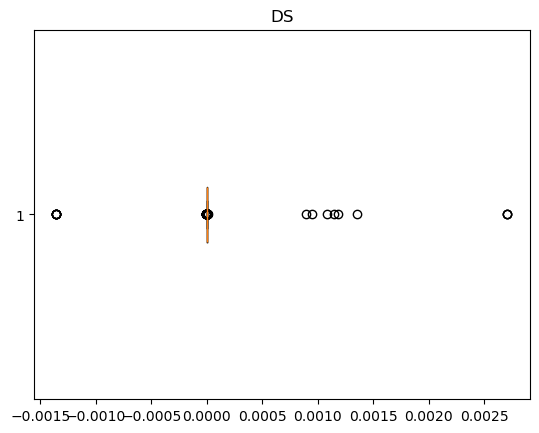

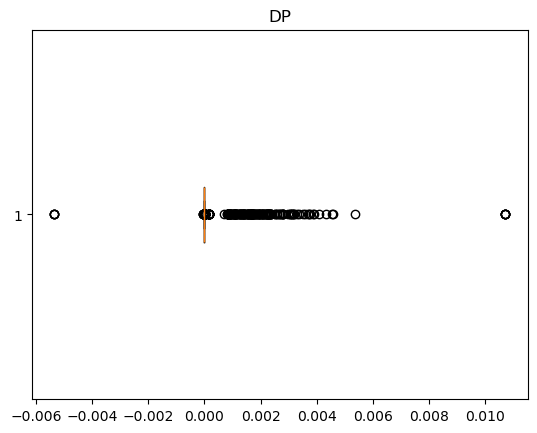

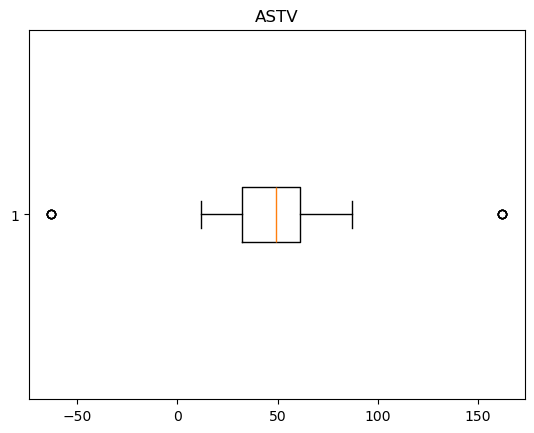

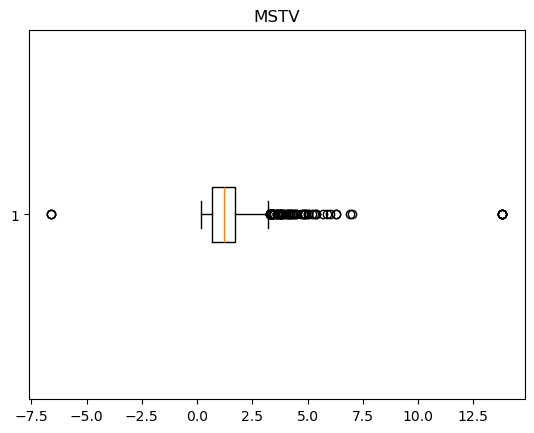

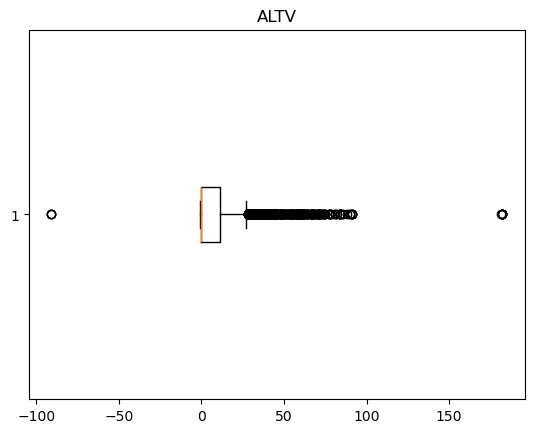

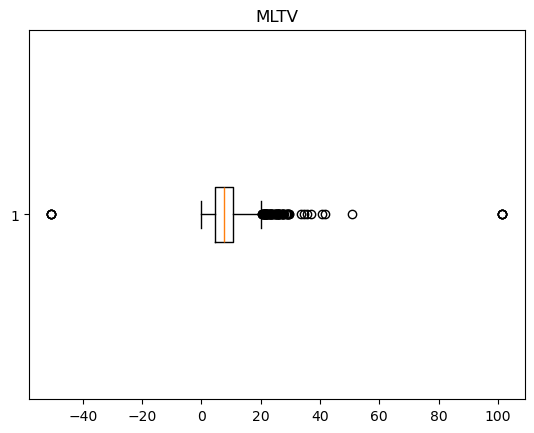

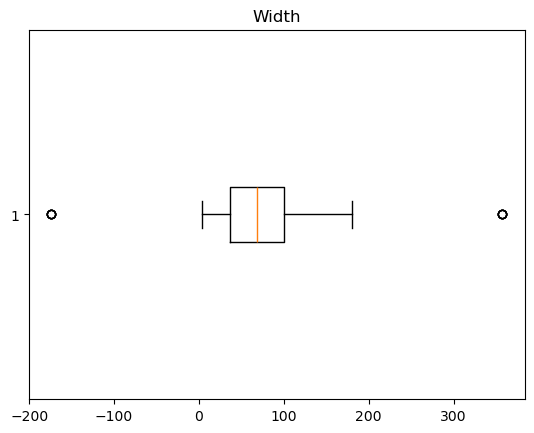

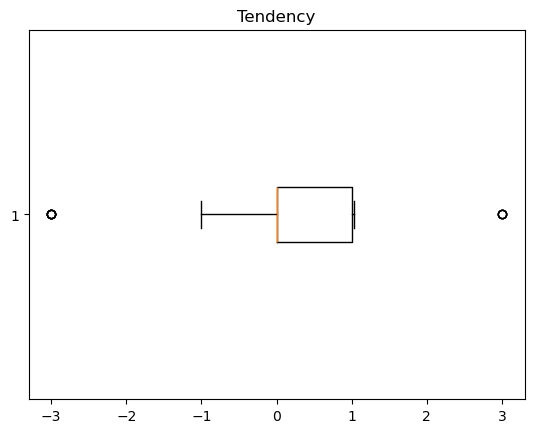

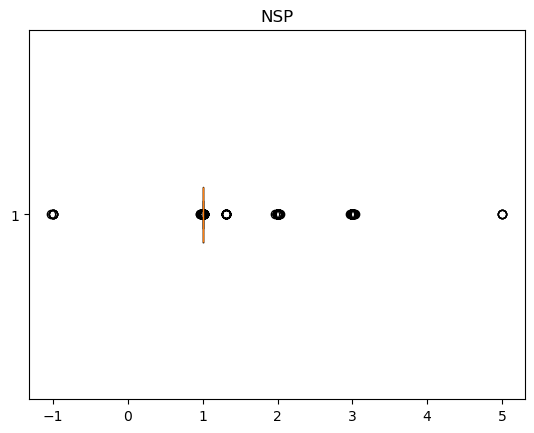

In [29]:
#  BOX PLOT
for i in df.columns:
    plt.boxplot(df[i],vert=False)
    plt.title(i)
    plt.show()

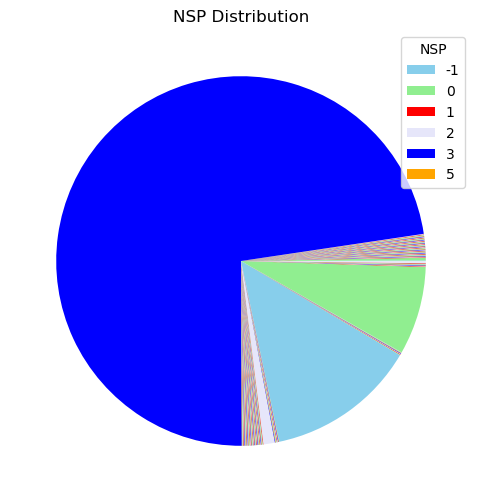

In [40]:
counts = df['NSP'].value_counts().sort_index()
counts.index = counts.index.astype(int)

plt.figure(figsize=(6,6))
# Use plt.pie directly (no pandas plot)
plt.pie(counts, colors=['skyblue','lightgreen','red','lavender','blue','orange'], labels=None)
plt.title('NSP Distribution')

# Add just one legend manually
plt.legend(counts.index.unique(), title='NSP', loc='upper right')

plt.show()

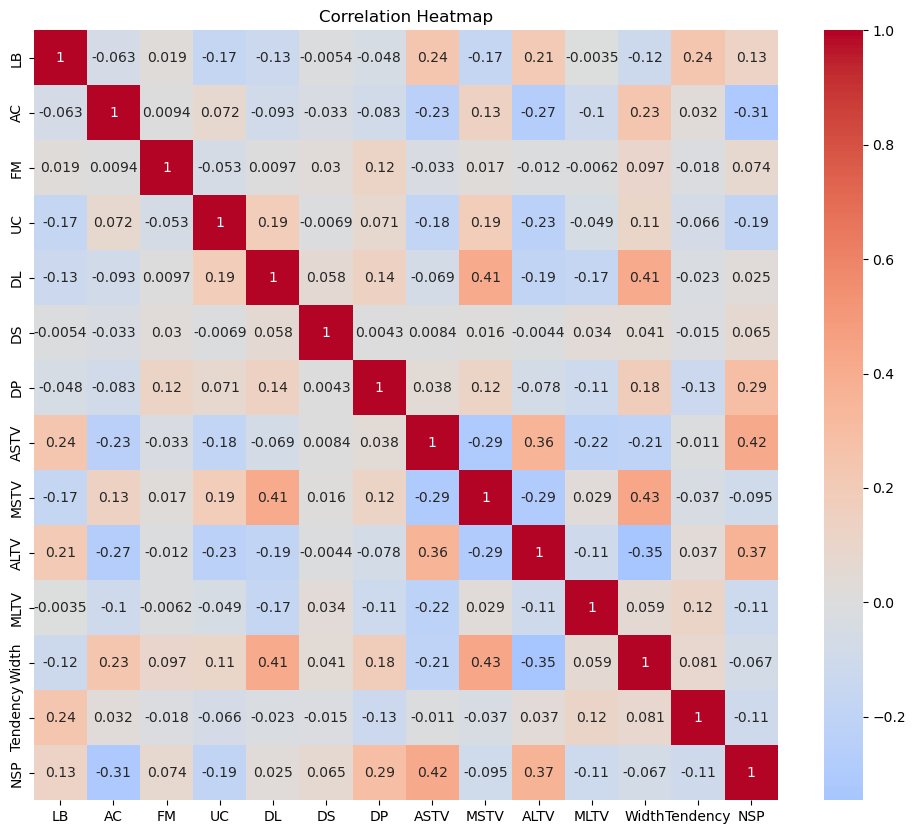

In [43]:
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


In [ ]:
# 4)  Pattern Recognition and Insights

In [10]:
for col in df.columns:
    co=df.corr()[col].sort_values(ascending=False)
    print(f'Correlations with {col} :',co)

Correlations with LB : LB          1.000000
ASTV        0.241857
Tendency    0.236864
ALTV        0.210446
NSP         0.131843
FM          0.018776
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.062839
Width      -0.118425
DL         -0.126536
UC         -0.166201
MSTV       -0.169561
Name: LB, dtype: float64
Correlations with AC : AC          1.000000
Width       0.234735
MSTV        0.133649
UC          0.071863
Tendency    0.031977
FM          0.009432
DS         -0.033101
LB         -0.062839
DP         -0.083277
DL         -0.093196
MLTV       -0.104875
ASTV       -0.230439
ALTV       -0.271041
NSP        -0.312022
Name: AC, dtype: float64
Correlations with FM : FM          1.000000
DP          0.121274
Width       0.097204
NSP         0.074048
DS          0.029899
LB          0.018776
MSTV        0.017055
DL          0.009718
AC          0.009432
MLTV       -0.006237
ALTV       -0.011936
Tendency   -0.018338
ASTV       -0.032691
UC         -0.053226

In [ ]:
# 5)  CONCLUSION

In [ ]:
'''
The analysis revealed moderate positive correlations among key variables 
like ASTV, ALTV, and NSP, indicating related patterns. Some features showed 
negative relationships, suggesting opposite effects. The heatmap helped
identify groups of interdependent variables, useful for feature selection.
Overall, these insights guide better modeling, reduce redundancy, and
support data-driven decision-making.'''